In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from functions import split

splitter_object = split.Splitter("./data", "|")

splitter_object.file_splitter("valeursfoncieres-2019.txt", "Nombre pieces principales", "vfoncieres_splitted")

Split fichier valeursfoncieres-2019.txt terminé


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [2]:
csv = pd.read_csv("./data/RAW/valeursfoncieres-2019.txt", sep = '|', decimal = ',', usecols = ['Nature mutation', 'Valeur fonciere', 'Code postal', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 'Nombre pieces principales', "Surface terrain", "Surface reelle bati"])

In [3]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Nombre pieces principales", "Surface terrain", "Type local", "Surface reelle bati"]][csv["Nature mutation"].str.contains("Vente", regex=True)]

In [4]:
csv = csv.dropna(subset=["Type local"])

In [11]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Nombre pieces principales", "Surface terrain", "Surface reelle bati", "Type local"]][csv["Type local"].str.contains("Appartement|Maison", regex=True)]

In [18]:
csv2 = csv.dropna(subset=['Valeur fonciere'])
csv2 = csv2.dropna(subset=['Code postal'])
csv2 = csv2.dropna(subset=['Surface reelle bati'])
csv2 = csv2[csv2["Nombre de lots"] < 6]
csv2 = csv2[csv2["Nombre pieces principales"] != 0]
csv2 = csv2[csv2["Surface reelle bati"] > 8]
csv3 = csv2.fillna(0)

In [19]:
csv3.to_csv("./data/CURATED/csv_clean_1.csv")
csv3

,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Surface reelle bati,Type local
0,37220.0,1000.0,1,1.0,0.0,20.0,Appartement
1,185100.0,1000.0,2,3.0,0.0,62.0,Appartement
3,209000.0,1160.0,0,4.0,940.0,90.0,Maison
4,134900.0,1370.0,0,5.0,490.0,101.0,Maison
5,192000.0,1340.0,0,4.0,708.0,88.0,Maison
...,...,...,...,...,...,...,...
2535783,17521000.0,75004.0,0,1.0,470.0,47.0,Appartement
2535784,17521000.0,75004.0,0,2.0,470.0,55.0,Appartement
2535785,17521000.0,75004.0,0,4.0,470.0,66.0,Appartement
2535786,17521000.0,75004.0,0,5.0,470.0,120.0,Appartement


In [50]:
df_anomaly = pd.read_csv('./data/CURATED/anomaly_csv_clean_1.csv', sep = ',', decimal = ',')
df_csv_clean = pd.read_csv('./data/CURATED/csv_clean_1.csv', sep = ',', decimal = ',')
df_anomaly = df_anomaly.drop(columns = ['Unnamed: 0'])
df_anomaly = df_anomaly.drop(columns = ['Valeur fonciere', 'Code postal', 'Nombre de lots', 'Nombre pieces principales', 'Surface terrain', 'Surface reelle bati', 'scores'])
df_anomaly = df_anomaly.rename(columns = {'Unnamed: 0.1':'Unnamed: 0'})
df_add_anomaly = df_csv_clean.merge(df_anomaly, how = 'left', on = 'Unnamed: 0')
df_add_anomaly = df_add_anomaly.fillna(0)
df_add_anomaly = df_add_anomaly[df_add_anomaly["anomaly"] == 0]
df_add_anomaly = df_add_anomaly.drop(columns = ['Unnamed: 0', 'anomaly'])
df_add_anomaly.to_csv('./data/CURATED/csv_clean_2.csv')



In [51]:
df_clean2 = pd.read_csv('./data/CURATED/csv_clean_2.csv', usecols=['Valeur fonciere', 'Code postal', 'Surface reelle bati'])
df_clean2["Prix moyen m²"] = df_clean2['Valeur fonciere']/df_clean2['Surface reelle bati']
df_prix_moyen = df_clean2.groupby('Code postal').mean('Valeur fonciere').drop(columns=['Valeur fonciere', 'Surface reelle bati'])

dict_prix_moyen = df_prix_moyen.to_dict()

In [82]:
cleaned_dataframe = pd.read_csv('./data/CURATED/csv_clean_2.csv', usecols = ['Code postal', 'Valeur fonciere', 'Nombre pieces principales', 'Surface terrain', 'Surface reelle bati'])

cleaned_dataframe = cleaned_dataframe.merge(df_prix_moyen, how='left', on='Code postal')
cleaned_dataframe = cleaned_dataframe.drop(columns=['Code postal'])
cleaned_dataframe = cleaned_dataframe[cleaned_dataframe['Valeur fonciere'].between(cleaned_dataframe['Valeur fonciere'].quantile(.10), cleaned_dataframe['Valeur fonciere'].quantile(.90))]
cleaned_dataframe

,Valeur fonciere,Nombre pieces principales,Surface terrain,Surface reelle bati,Prix moyen m²
1,185100.0,3.0,0.0,62.0,2600.383840
2,209000.0,4.0,940.0,90.0,2177.935696
3,134900.0,5.0,490.0,101.0,1746.718816
4,192000.0,4.0,708.0,88.0,1738.147136
6,65000.0,3.0,0.0,69.0,2600.383840
...,...,...,...,...,...
852641,280000.0,2.0,0.0,20.0,21905.080787
852642,201000.0,1.0,0.0,28.0,16986.950990
852643,320905.0,1.0,0.0,27.0,21905.080787
852657,295000.0,1.0,0.0,22.0,21905.080787


<AxesSubplot:>

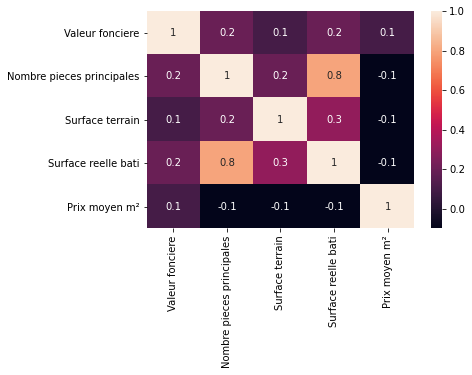

In [83]:
# sample_cleaned_dataframe = cleaned_dataframe.sample(n=20000, random_state=2)
matrice_corr = cleaned_dataframe.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [84]:
sample_cleaned_dataframe

,Valeur fonciere,Nombre pieces principales,Surface terrain,Surface reelle bati,Prix moyen m²
549466,169000.0,4.0,651.0,89.0,1290.956926
635863,265000.0,5.0,424.0,95.0,25908.675953
372428,174750.0,4.0,252.0,122.0,3196.182497
812100,142000.0,2.0,0.0,31.0,4526.638064
616371,254000.0,3.0,0.0,87.0,3059.820768
...,...,...,...,...,...
107320,162000.0,4.0,267.0,80.0,2030.092563
533334,130425.0,5.0,0.0,96.0,3824.188688
760583,290000.0,1.0,0.0,34.0,13320.999354
252776,95000.0,1.0,30.0,18.0,2152.075983


In [91]:
X = pd.DataFrame(np.c_[cleaned_dataframe['Nombre pieces principales'],cleaned_dataframe['Surface terrain'],cleaned_dataframe['Surface reelle bati'], cleaned_dataframe['Prix moyen m²']], columns = ['Nombre pieces principales','Surface terrain','Surface reelle bati', 'Prix moyen m²'])

Y = cleaned_dataframe['Valeur fonciere']
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [92]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=445)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [94]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43262.429246627784
Mean Squared Error: 3456749246.4855046
Root Mean Squared Error: 58794.12595221996


In [95]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'euros.')
print('Prediction moyenne :', round(np.mean(predictions), 2), 'euros')

Mean Absolute Error: 43262.43 euros.
Prediction moyenne : 186300.12 euros


In [96]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 72.27 %.
